# Forward Kinematics Python Examples

This notebook combines Python scripts from the forward kinematics section of the robotics document, demonstrating key concepts in spatial descriptions and transformations using NumPy and SciPy.

## 1. Rotation Matrices: Random Rotation Example

This section demonstrates creating a random rotation matrix using SciPy's Rotation class, and verifies its properties such as determinant and orthogonality.

In [ ]:
import numpy as np
from scipy.spatial.transform import Rotation as R

# Create a random rotation
r = R.random()
R_matrix = r.as_matrix()
print("Rotation matrix:")
print(R_matrix)
print("Determinant:", np.linalg.det(R_matrix))
print("R^T R:", np.dot(R_matrix.T, R_matrix))

Rotation matrix:
[[-0.00959766  0.71130811 -0.70281481]
 [-0.95041157  0.21199891  0.2275397 ]
 [ 0.31084681  0.67014717  0.67400076]]
Determinant: 0.9999999999999999
R^T R: [[ 1.00000000e+00 -4.63790977e-17 -2.10738696e-17]
 [-4.63790977e-17  1.00000000e+00  9.11502205e-19]
 [-2.10738696e-17  9.11502205e-19  1.00000000e+00]]


## 2. Special Rotation Matrices

This section shows how to generate rotation matrices for rotations about the principal axes (X, Y, Z) using SciPy's Rotation class with rotation vectors.

In [ ]:
# Rotation about x by 45 degrees
r_X = R.from_rotvec([np.pi/4, 0, 0])
print("R_X(45 degrees):")
print(r_X.as_matrix())

# Similarly for y and z
r_Y = R.from_rotvec([0, np.pi/4, 0])
r_Z = R.from_rotvec([0, 0, np.pi/4])

R_X(45 degrees):
[[ 1.          0.          0.        ]
 [ 0.          0.70710678 -0.70710678]
 [ 0.          0.70710678  0.70710678]]


## 3. Composition of Rotations

This section illustrates intrinsic and extrinsic composition of rotations. Intrinsic composition applies rotations relative to the body's current orientation, while extrinsic applies them relative to the fixed frame.

In [ ]:
# Define two rotations
r1 = R.from_rotvec([np.pi/6, 0, 0])  # 30 degrees about x
r2 = R.from_rotvec([0, np.pi/4, 0])  # 45 degrees about y

# Intrinsic composition: [R] = [R1][R2]
r_intrinsic = r1 * r2
print("Intrinsic rotation matrix:")
print(r_intrinsic.as_matrix())

# Extrinsic composition: [R] = [R2][R1]
r_extrinsic = r2 * r1
print("Extrinsic rotation matrix:")
print(r_extrinsic.as_matrix())

Intrinsic rotation matrix:
[[ 7.07106781e-01 -2.77555756e-17  7.07106781e-01]
 [ 3.53553391e-01  8.66025404e-01 -3.53553391e-01]
 [-6.12372436e-01  5.00000000e-01  6.12372436e-01]]
Extrinsic rotation matrix:
[[ 7.07106781e-01  3.53553391e-01  6.12372436e-01]
 [-2.77555756e-17  8.66025404e-01 -5.00000000e-01]
 [-7.07106781e-01  3.53553391e-01  6.12372436e-01]]


## 4. Euler Angles Conversion

This section demonstrates converting Euler angles to a rotation matrix and back, showing the round-trip conversion for the XYZ sequence.

In [ ]:
# Given Euler angles (alpha, beta, gamma) in radians
original_angles = np.array([0.1, 0.2, 0.3])  # example values

# Generate rotation matrix from Euler angles
r_original = R.from_euler('xyz', original_angles)
R_matrix = r_original.as_matrix()
print("Rotation matrix from original angles:")
print(R_matrix)

# Now, use inverse kinematics to extract Euler angles
extracted_angles = r_original.as_euler('xyz', degrees=False)
print("Extracted Euler angles (alpha, beta, gamma):")
print(extracted_angles)

# Check if they match (within numerical precision)
difference = np.abs(original_angles - extracted_angles)
print("Difference between original and extracted:")
print(difference)
print("Are they close?", np.allclose(original_angles, extracted_angles))

Rotation matrix from original angles:
[[ 0.93629336 -0.27509585  0.21835066]
 [ 0.28962948  0.95642509 -0.03695701]
 [-0.19866933  0.0978434   0.97517033]]
Extracted Euler angles (alpha, beta, gamma):
[0.1 0.2 0.3]
Difference between original and extracted:
[0.00000000e+00 1.66533454e-16 5.55111512e-17]
Are they close? True


## 5. Homogeneous Transformations

This section shows how to apply a homogeneous transformation matrix to transform a point from one coordinate frame to another.

In [ ]:
# Homogeneous transformation matrix from frame B to frame A
A_T_B = np.array([
    [0.866, -0.500, 0.000, 10.0],
    [0.500,  0.866, 0.000,  5.0],
    [0.000,  0.000, 1.000,  0.0],
    [0.000,  0.000, 0.000,  1.0]
])

# Point P in frame B (homogeneous coordinates)
B_P = np.array([3.0, 7.0, 0.0, 1.0])

# Transform point into frame A
A_P = A_T_B @ B_P

# Extract just the 3D coordinates
print("\nCoordinates of P in frame A:")
print(A_P[:3])


Coordinates of P in frame A:
[ 9.098 12.562  0.   ]


## 6. Inverse and Compound Transformations

This section demonstrates composing two homogeneous transformations and computing the inverse of the compound transformation, then applying them to a point.

In [ ]:
# Define two homogeneous transformations

# Transformation T1: rotation by 30 degrees around z-axis, translation [10, 5, 0]
r1 = R.from_euler('z', np.pi/6)
T1 = np.eye(4)
T1[:3, :3] = r1.as_matrix()
T1[:3, 3] = [10, 5, 0]

# Transformation T2: rotation by 45 degrees around x-axis, translation [2, 3, 1]
r2 = R.from_euler('x', np.pi/4)
T2 = np.eye(4)
T2[:3, :3] = r2.as_matrix()
T2[:3, 3] = [2, 3, 1]

# Compound transformation: T_compound = T1 @ T2
T_compound = T1 @ T2
print("Compound transformation matrix:")
print(T_compound)

# Inverse of the compound transformation
T_inv = np.linalg.inv(T_compound)
print("Inverse transformation matrix:")
print(T_inv)

# Example: Apply compound transformation to a point
P = np.array([1.0, 2.0, 3.0, 1.0])  # Point in homogeneous coordinates
P_transformed = T_compound @ P
print("Point after compound transformation:", P_transformed[:3])

# Apply inverse to get back
P_back = T_inv @ P_transformed
print("Point after applying inverse:", P_back[:3])

Compound transformation matrix:
[[ 0.8660254  -0.35355339  0.35355339 10.23205081]
 [ 0.5         0.61237244 -0.61237244  8.59807621]
 [ 0.          0.70710678  0.70710678  1.        ]
 [ 0.          0.          0.          1.        ]]
Inverse transformation matrix:
[[ 8.66025404e-01  5.00000000e-01  4.49653636e-17 -1.31602540e+01]
 [-3.53553391e-01  6.12372436e-01  7.07106781e-01 -2.35475540e+00]
 [ 3.53553391e-01 -6.12372436e-01  7.07106781e-01  9.40541835e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Point after compound transformation: [11.4516296   8.48570378  4.53553391]
Point after applying inverse: [1. 2. 3.]


## 7. Forward Kinematics of UR5e Robot Arm

This section demonstrates forward kinematics for the UR5e robot arm using the Modified Denavit-Hartenberg (DHM) parameters. The DHM convention uses parameters $a_i$, $\alpha_i$, $d_i$, and $\theta_i$, with positive link lengths preferred and offsets added to $\theta$ for negative lengths.

### DHM Parameters for UR5e

| Joint $i$ | $a_{i}$ [mm] | $\alpha_{i}$ [rad] | $d_{i}$ [mm] | $\theta_{i}$ [rad] |
|-----------|--------------|-------------------|--------------|-------------------|
| 1         | 0            | 0                 | 162.5        | 0                 |
| 2         | 0            | $\frac{\pi}{2}$   | 0            | $\pi$             |
| 3         | 425          | 0                 | 0            | 0                 |
| 4         | 392.25       | 0                 | 133.3        | 0                 |
| 5         | 0            | $-\frac{\pi}{2}$  | 99.7         | 0                 |
| 6         | 0            | $\frac{\pi}{2}$   | 99.6         | $\pi$             |

The kinematic diagram and DHM parameters are visualized below:

![UR5e Kinematic Diagram](sections/imgs/UR_DH.png)

![RoboDK Software](sections/imgs/RoboDK.png)

![UR5e in RoboDK](sections/imgs/UR5e_RoboDK.png)

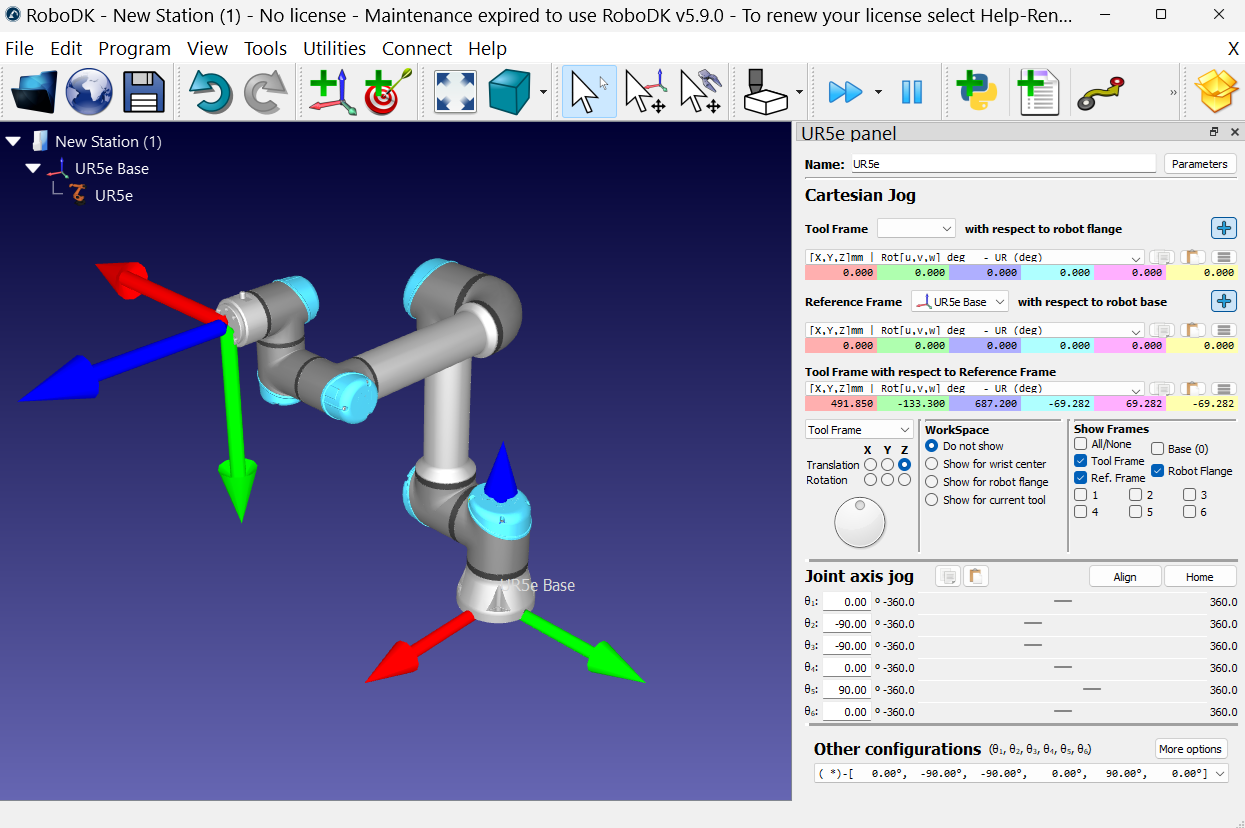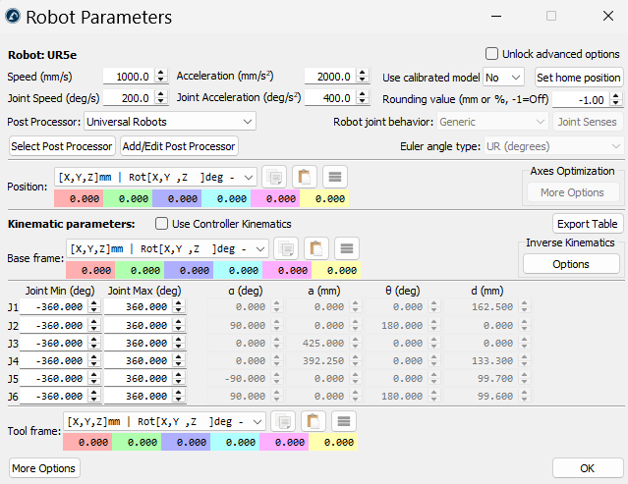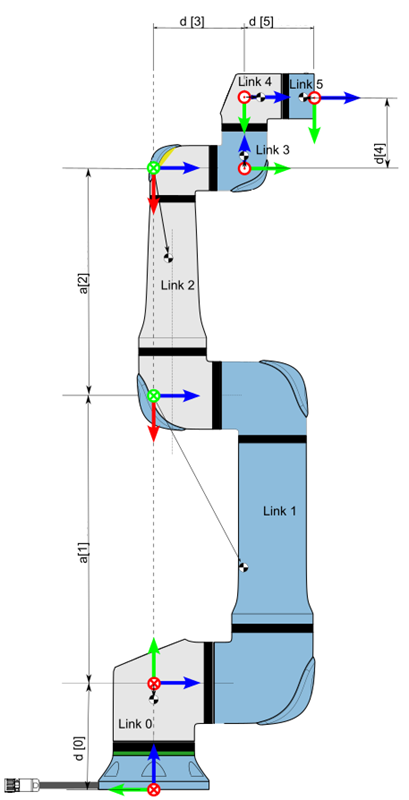

In [ ]:
import numpy as np
from scipy.spatial.transform import Rotation as R

# DHM parameters for UR5e (in mm and rad)
a = [0, 0, 425, 392.25, 0, 0]
alpha = [0, np.pi/2, 0, 0, -np.pi/2, np.pi/2]
d = [162.5, 0, 0, 133.3, 99.7, 99.6]
theta_offsets = [0, np.pi, 0, 0, 0, np.pi]

# Given joint angles in degrees
joint_angles_deg = [0, -90, -90, 0, 90, 0]
joint_angles_rad = np.deg2rad(joint_angles_deg)

# Add offsets to joint angles
theta = joint_angles_rad + theta_offsets

# Function to compute DH transformation matrix
def dh_transform(a, alpha, d, theta):
    T = np.eye(4)
    # Trans_x(a)
    T[0, 3] = a
    # Rot_x(alpha)
    T[:3, :3] = R.from_rotvec([alpha, 0, 0]).as_matrix()
    # Trans_z(d)
    T_z = np.eye(4)
    T_z[2, 3] = d
    T = T @ T_z
    # Rot_z(theta)
    T_theta = np.eye(4)
    T_theta[:3, :3] = R.from_rotvec([0, 0, theta]).as_matrix()
    T = T @ T_theta
    return T

# Compute total transformation
T_total = np.eye(4)
for i in range(6):
    T_i = dh_transform(a[i], alpha[i], d[i], theta[i])
    T_total = T_total @ T_i

print("End-effector transformation matrix:")
print(T_total)

End-effector transformation matrix:
[[-2.22044605e-16  2.22044605e-16  1.00000000e+00  4.91850000e+02]
 [-1.00000000e+00 -1.22460635e-16 -2.22044605e-16 -1.33300000e+02]
 [ 1.22460635e-16 -1.00000000e+00  2.22044605e-16  6.87200000e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


# PUMA 560 Inverse Kinematics

This section demonstrates the inverse kinematics solution for the PUMA 560 robot arm. The inverse kinematics problem involves finding the joint angles that result in a desired end-effector pose (position and orientation).

The PUMA 560 has 6 degrees of freedom with a spherical wrist design, which allows for an analytical solution that can yield up to 8 different configurations for the same end-effector pose.

PUMA 560 Denavit-Hartenberg Parameters:
======================================================================
Joint i  αᵢ₋₁ (deg)   aᵢ₋₁ (mm)    dᵢ (mm)      θᵢ (deg)  
----------------------------------------------------------------------
1        0            0            0            θ₁*       
2        -90          0            0            θ₂*       
3        0            431.8        149.09       θ₃*       
4        -90          20.3         433.07       θ₄*       
5        90           0            0            θ₅*       
6        -90          0            0            θ₆*       
======================================================================

* Variable joint angles

Notes:
- d₆ = 0 (incorporated into tool transform H)
- Base offset: b = 500 mm
- Tool offset: l = 60 mm

Key DH Parameters:
- a₂ = 431.8 mm (upper arm length)
- a₃ = 20.3 mm (forearm offset)
- d₃ = 149.09 mm (shoulder offset)
- d₄ = 433.07 mm (forearm length)

## Algorithm Overview

1. **Decouple the problem**: Use the spherical wrist property to separate position (first 3 joints) from orientation (last 3 joints)
2. **Solve for θ₁**: From the constraint equation involving the wrist center
3. **Solve for θ₃**: From the distance constraint equation
4. **Solve for θ₂**: Using the remaining position equations
5. **Solve for θ₄, θ₅, θ₆**: From the spherical wrist rotation matrix

### DH Parameter Explanation

The DH (Denavit-Hartenberg) parameters define the geometric relationship between consecutive joint frames:

- **αᵢ₋₁**: Twist angle about the x-axis (rotation from zᵢ₋₁ to zᵢ about xᵢ₋₁)
- **aᵢ₋₁**: Link length along the x-axis (distance from zᵢ₋₁ to zᵢ along xᵢ₋₁)
- **dᵢ**: Link offset along the z-axis (distance from xᵢ₋₁ to xᵢ along zᵢ)
- **θᵢ**: Joint angle about the z-axis (rotation from xᵢ₋₁ to xᵢ about zᵢ)

The transformation matrix between frames i-1 and i is:
$$^{i-1}T_i = X(a_{i-1}, α_{i-1}) \cdot Z(d_i, θ_i)$$

This represents a screw displacement: first a rotation and translation about/along the x-axis, then a rotation and translation about/along the z-axis.

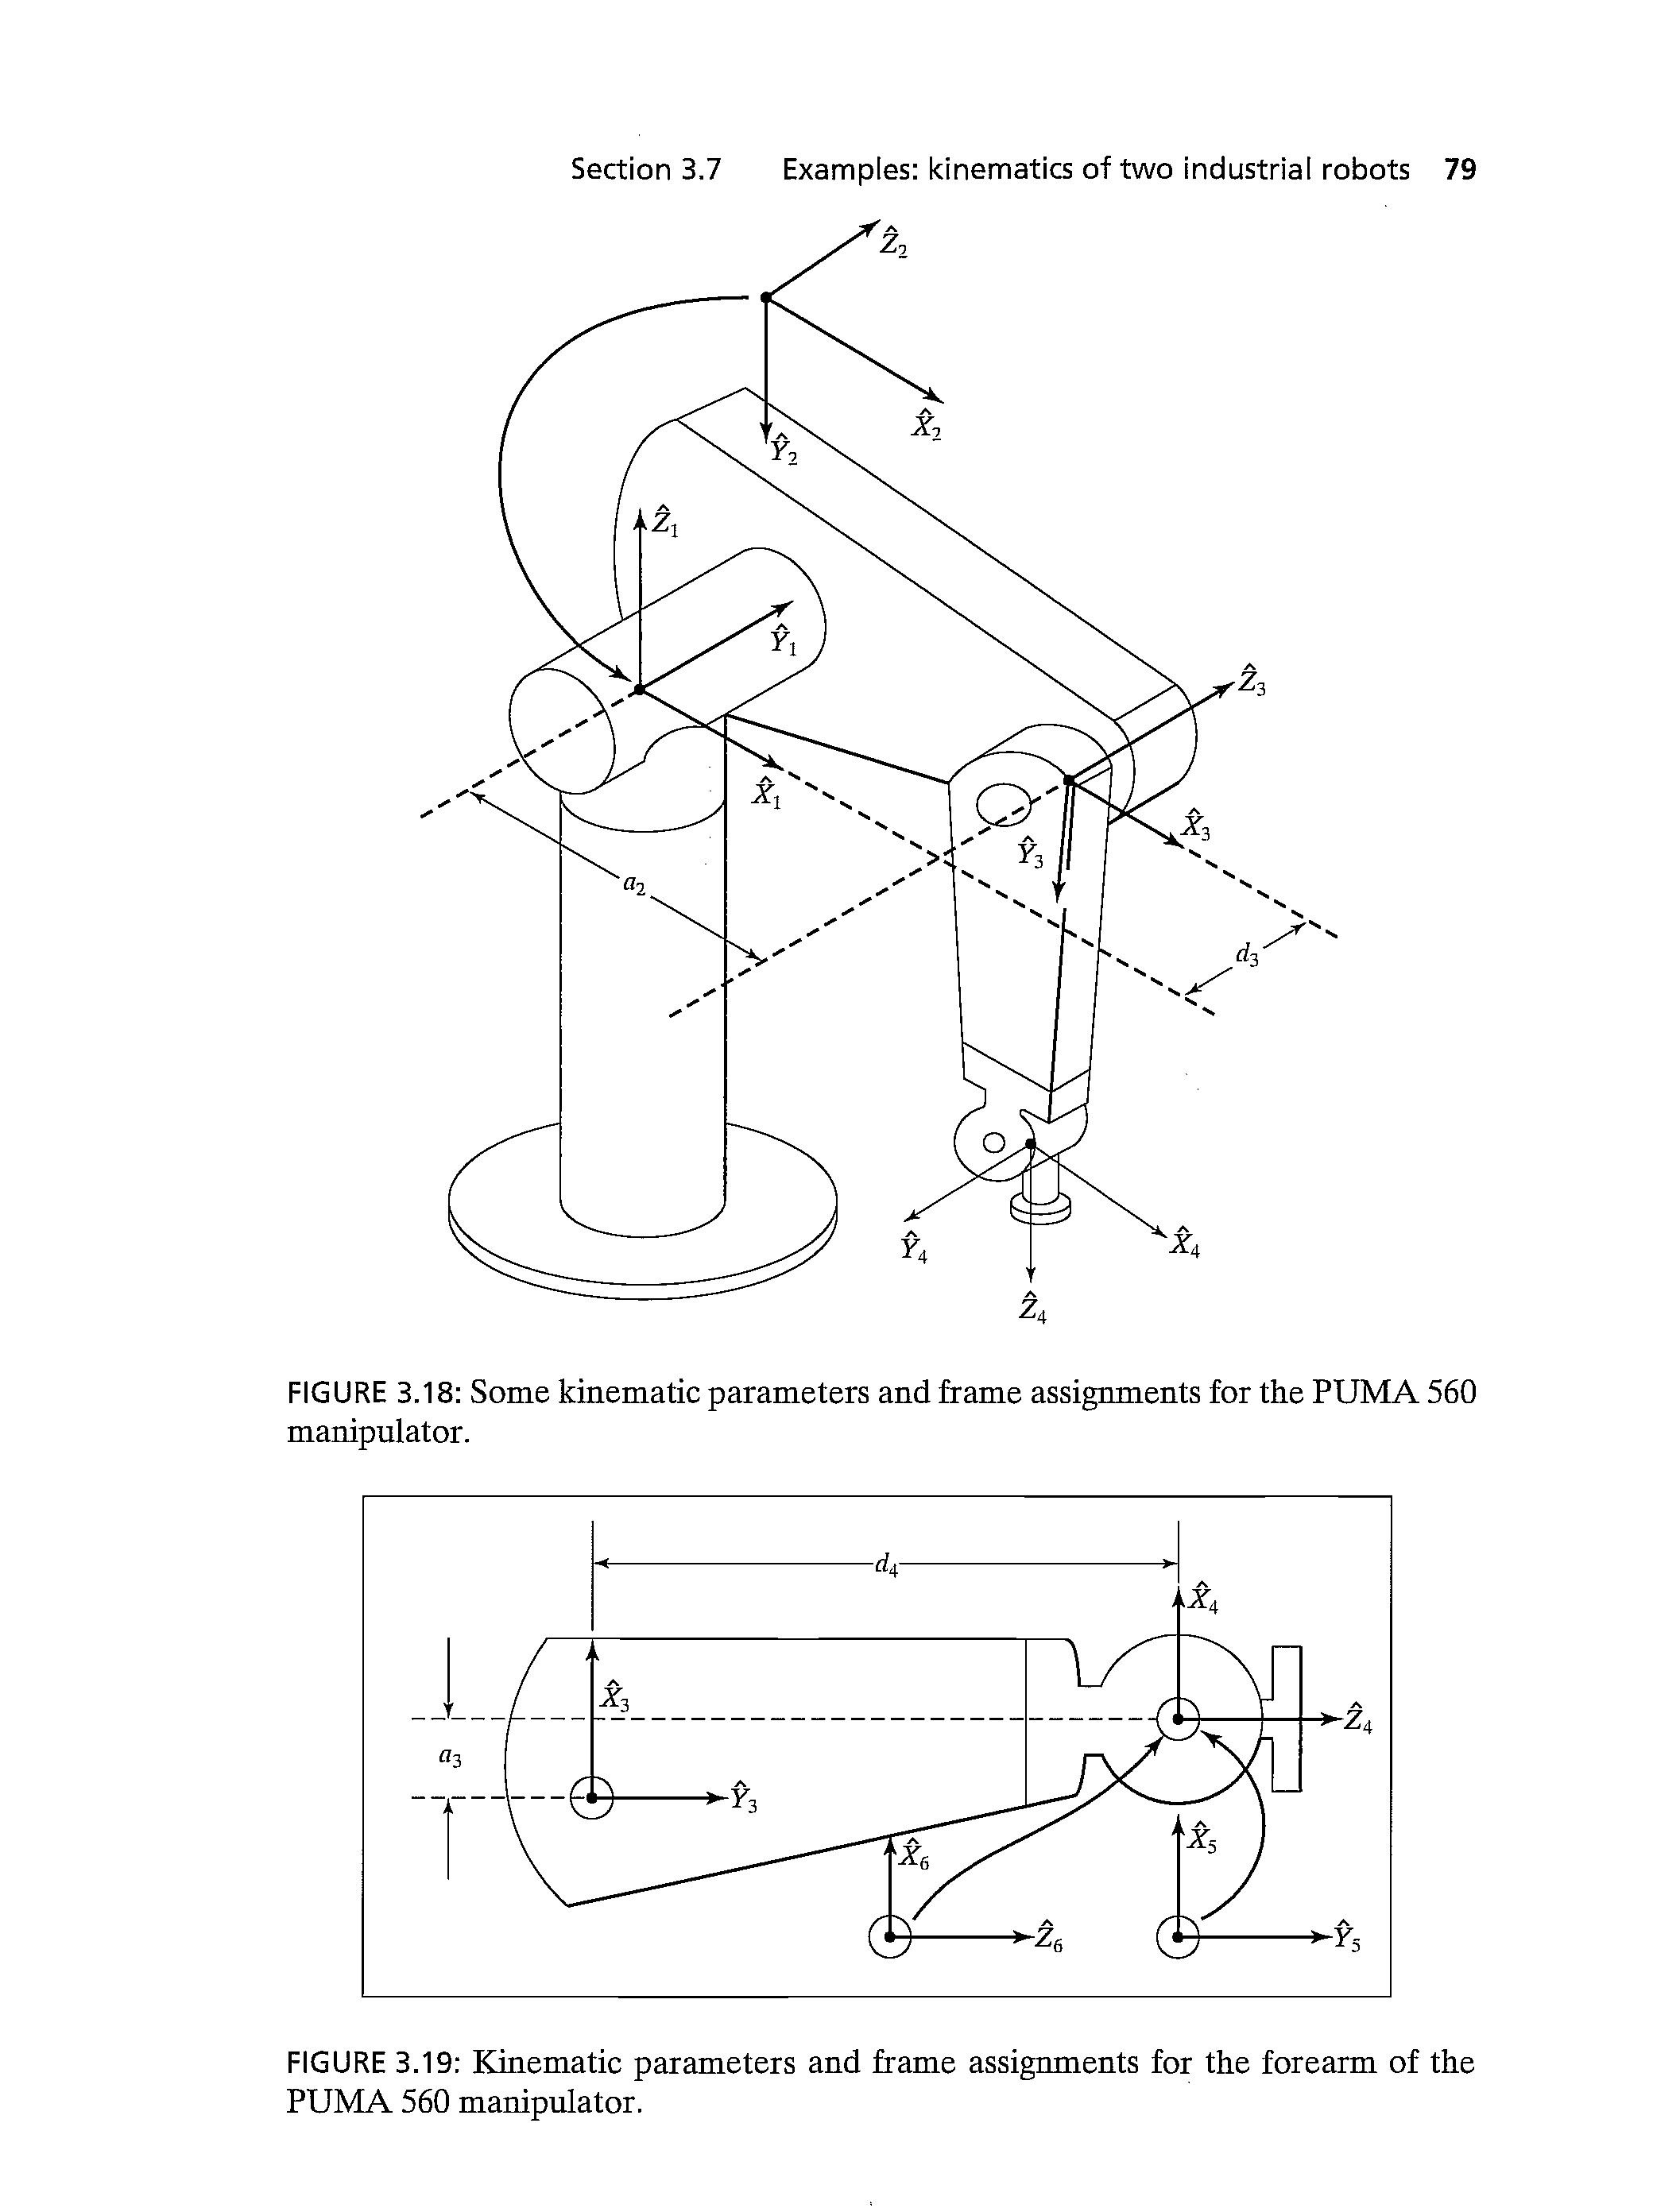

## Helper Functions and Parameters

First, let's define the necessary helper functions and PUMA 560 parameters:

In [ ]:
from math import sin, cos, atan2, acos, sqrt, pi, radians, degrees

# PUMA 560 Denavit-Hartenberg Parameters (in meters)
# Note: d6 is combined into H (tool transform) so we set d6 = 0
a2 = 0.4318
a3 = 0.0203
d3 = 0.14909
d4 = 0.43307
d6 = 0.0

# Base and Tool Transforms
b = 0.5   # base offset along z
l = 0.06  # tool offset along z

G = np.array([  # Base transform
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, b],
    [0, 0, 0, 1]
])

H = np.array([  # Tool transform
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, l],
    [0, 0, 0, 1]
])

print("PUMA 560 DH Parameters:")
print(f"a2 = {a2} m")
print(f"a3 = {a3} m")
print(f"d3 = {d3} m")
print(f"d4 = {d4} m")
print(f"Base offset (b) = {b} m")
print(f"Tool offset (l) = {l} m")

PUMA 560 DH Parameters:
a2 = 0.4318 m
a3 = 0.0203 m
d3 = 0.14909 m
d4 = 0.43307 m
Base offset (b) = 0.5 m
Tool offset (l) = 0.06 m


In [ ]:
def solve_trig_equation(A, B, C):
    """
    Solve the equation: A*cos(x) + B*sin(x) = C

    Returns two solutions [x_plus, x_minus] if real solutions exist,
    or an empty list if |C| > sqrt(A²+B²).

    Uses the identity: A*cos(x) + B*sin(x) = R*cos(x - φ)
    where R = sqrt(A²+B²) and φ = atan2(B, A)
    """
    r = sqrt(A*A + B*B)
    if r < 1e-15:
        return []
    if abs(C) > r:
        return []

    base_angle = atan2(B, A)
    delta = acos(C / r)
    return [base_angle + delta, base_angle - delta]

def normalize_angle(a):
    """Wrap angle a into [-π, π]"""
    return (a + pi) % (2*pi) - pi

def normalize_all(q):
    """Normalize each angle in list q to [-π, π]"""
    return np.array([normalize_angle(a) for a in q])

def is_equivalent(q1, q2, tol=1e-3):
    """Check if two sets of joint angles are equivalent within tolerance"""
    q1_norm = normalize_all(q1)
    q2_norm = normalize_all(q2)
    return np.all(np.abs(q1_norm - q2_norm) < tol)

print("Helper functions defined:")
print("- solve_trig_equation(): Solves A*cos(x) + B*sin(x) = C")
print("- normalize_angle(): Wraps angles to [-π, π]")
print("- normalize_all(): Normalizes all joint angles")
print("- is_equivalent(): Checks if two joint configurations are equivalent")

Helper functions defined:
- solve_trig_equation(): Solves A*cos(x) + B*sin(x) = C
- normalize_angle(): Wraps angles to [-π, π]
- normalize_all(): Normalizes all joint angles
- is_equivalent(): Checks if two joint configurations are equivalent


In [ ]:
def forward_kinematics_first_three(th1, th2, th3, a2, a3, d3):
    """
    Compute the transform from the base to the wrist (frame 3) using the first three joints.
    This is needed for solving the spherical wrist orientation.
    """
    T1 = np.array([
        [cos(th1), 0, -sin(th1), 0],
        [sin(th1), 0,  cos(th1), 0],
        [0,       -1,         0, 0],
        [0,        0,         0, 1]
    ])

    T2 = np.array([
        [cos(th2), -sin(th2), 0, a2*cos(th2)],
        [sin(th2),  cos(th2), 0, a2*sin(th2)],
        [0,                0, 1,           0],
        [0,                0, 0,           1]
    ])

    T3 = np.array([
        [cos(th3), 0, -sin(th3), a3*cos(th3)],
        [sin(th3), 0,  cos(th3), a3*sin(th3)],
        [0,       -1,         0,          d3],
        [0,        0,         0,           1]
    ])

    return T1 @ T2 @ T3

print("Forward kinematics function for first three joints defined.")

Forward kinematics function for first three joints defined.


## Main Inverse Kinematics Algorithm

The main inverse kinematics function implements the analytical solution for the PUMA 560:

In [ ]:
def puma_inverse_kinematics(T, G, H, a2, a3, d3, d4, d6):
    """
    Compute all IK solutions for the PUMA 560.

    Parameters:
    -----------
    T : np.ndarray (4x4)
        Desired end-effector pose (homogeneous transformation matrix)
    G : np.ndarray (4x4)
        Base transform
    H : np.ndarray (4x4)
        Tool transform
    a2, a3, d3, d4, d6 : float
        PUMA 560 DH parameters

    Returns:
    --------
    solutions : list
        List of joint angle solutions [θ1, θ2, θ3, θ4, θ5, θ6] in radians

    Algorithm Steps:
    ----------------
    1. Compute T' = G⁻¹ · T · H⁻¹ to remove base/tool offsets
    2. Extract wrist center from T'
    3. Solve for θ₁ from: -sin(θ₁)*px + cos(θ₁)*py = d₃
    4. Solve for θ₃ from distance constraint equation
    5. For each (θ₁,θ₃), solve for θ₂
    6. Compute spherical wrist angles (θ₄,θ₅,θ₆)
    """
    solutions = []

    # Step 1: Remove base/tool offsets
    T_prime = np.linalg.inv(G) @ T @ np.linalg.inv(H)

    # Step 2: Extract wrist center (4th column of T')
    p_wc = T_prime[:3, 3]
    px, py, pz = p_wc

    print(f"Wrist center position: [{px:.4f}, {py:.4f}, {pz:.4f}]")

    # Step 3: Solve for θ₁
    # Equation: -sin(θ₁)*px + cos(θ₁)*py = d₃
    # Rewritten as: py*cos(θ₁) + (-px)*sin(θ₁) = d₃
    theta1_candidates = solve_trig_equation(py, -px, d3)
    if not theta1_candidates:
        print("No solutions found for θ₁")
        return solutions

    print(f"θ₁ candidates: {[degrees(th) for th in theta1_candidates]} degrees")

    # Step 4: Solve for θ₃
    # Distance constraint equation leads to:
    # 2*a2*(a3*cos(θ₃) - d4*sin(θ₃)) = (px²+py²+pz²) - (a2²+a3²+d3²+d4²)
    C3 = (px**2 + py**2 + pz**2) - (a2**2 + a3**2 + d3**2 + d4**2)
    theta3_candidates = solve_trig_equation(2*a2*a3, -2*a2*d4, C3)
    if not theta3_candidates:
        print("No solutions found for θ₃")
        return solutions

    print(f"θ₃ candidates: {[degrees(th) for th in theta3_candidates]} degrees")

    # Step 5: For each (θ₁, θ₃), solve for θ₂
    for i, th1 in enumerate(theta1_candidates):
        c1 = cos(th1)
        s1 = sin(th1)
        X_val = c1*px + s1*py  # effective horizontal distance

        for j, th3 in enumerate(theta3_candidates):
            c3 = cos(th3)
            s3 = sin(th3)
            A1 = a2 + a3*c3 - d4*s3
            B1 = a3*s3 + d4*c3
            denom = X_val**2 + pz**2

            if abs(denom) < 1e-12:
                continue

            c2 = (X_val*A1 - pz*B1) / denom
            s2 = (-pz*A1 - X_val*B1) / denom
            th2 = atan2(s2, c2)

            print(f"Solution branch {i+1}.{j+1}: θ₁={degrees(th1):.1f}°, θ₂={degrees(th2):.1f}°, θ₃={degrees(th3):.1f}°")

            # Step 6: Solve for the wrist angles (θ₄, θ₅, θ₆)
            T0_3 = forward_kinematics_first_three(th1, th2, th3, a2, a3, d3)
            R0_3 = T0_3[:3, :3]
            R_prime = T_prime[:3, :3]
            R3_6 = R0_3.T @ R_prime

            # For the spherical wrist: solve for θ₅ first
            if abs(R3_6[2,2]) > 1.0:
                continue

            th5_candidates = [acos(R3_6[2,2]), -acos(R3_6[2,2])]

            for k, th5 in enumerate(th5_candidates):
                if abs(sin(th5)) < 1e-6:  # Singular case: θ₅ = 0 or π
                    th4 = 0.0  # Choose θ₄ = 0 by convention
                    th6 = atan2(-R3_6[0,1], R3_6[0,0])
                else:  # Non-singular case
                    th4 = atan2(R3_6[1,2]/(-sin(th5)), R3_6[0,2]/(-sin(th5)))
                    th6 = atan2(R3_6[2,1]/(-sin(th5)), R3_6[2,0]/sin(th5))

                sol = [th1, th2, th3, th4, th5, th6]
                solutions.append(normalize_all(sol))

    print(f"\\nFound {len(solutions)} total IK solutions")
    return solutions

## Testing and Verification

Let's test the inverse kinematics with a known joint configuration and verify that the solutions are correct:

In [ ]:
# Test with a known joint configuration
test_joints_deg = [30, -40, -45, 45, 25, 33]  # degrees
test_joints_rad = np.radians(test_joints_deg)  # convert to radians

print("Test Configuration:")
print(f"Joint angles (degrees): {test_joints_deg}")
print(f"Joint angles (radians): {np.round(test_joints_rad, 4)}")

# Compute forward kinematics for the test configuration
# We need the forward_kinematics function from earlier in the notebook
def forward_kinematics(q, G, H, a2, a3, d3, d4, d6):
    """Complete forward kinematics including base and tool transforms"""
    th1, th2, th3, th4, th5, th6 = q

    # DH transforms for each joint
    T1 = np.array([
        [cos(th1), 0, -sin(th1), 0],
        [sin(th1), 0,  cos(th1), 0],
        [0,       -1,         0, 0],
        [0,        0,         0, 1]
    ])

    T2 = np.array([
        [cos(th2), -sin(th2), 0, a2*cos(th2)],
        [sin(th2),  cos(th2), 0, a2*sin(th2)],
        [0,                0, 1,           0],
        [0,                0, 0,           1]
    ])

    T3 = np.array([
        [cos(th3), 0, -sin(th3), a3*cos(th3)],
        [sin(th3), 0,  cos(th3), a3*sin(th3)],
        [0,       -1,         0,          d3],
        [0,        0,         0,           1]
    ])

    T4 = np.array([
        [cos(th4), 0,  sin(th4), 0],
        [sin(th4), 0, -cos(th4), 0],
        [0,        1,         0, d4],
        [0,        0,         0,  1]
    ])

    T5 = np.array([
        [cos(th5), 0, -sin(th5), 0],
        [sin(th5), 0,  cos(th5), 0],
        [0,       -1,         0, 0],
        [0,        0,         0, 1]
    ])

    T6 = np.array([
        [cos(th6), -sin(th6), 0, 0],
        [sin(th6),  cos(th6), 0, 0],
        [0,                0, 1, d6],
        [0,                0, 0,  1]
    ])

    # Chain all transformations
    T_arm = T1 @ T2 @ T3 @ T4 @ T5 @ T6
    T = G @ T_arm @ H
    return T

# Calculate the end-effector pose for our test configuration
T_test = forward_kinematics(test_joints_rad, G, H, a2, a3, d3, d4, d6)

print("\\nEnd-effector pose (T_test):")
print(np.round(T_test, 4))

Test Configuration:
Joint angles (degrees): [30, -40, -45, 45, 25, 33]
Joint angles (radians): [ 0.5236 -0.6981 -0.7854  0.7854  0.4363  0.576 ]
\nEnd-effector pose (T_test):
[[ 0.7786 -0.1477  0.6099  0.6237]
 [-0.6158 -0.367   0.6972  0.5529]
 [ 0.1209 -0.9184 -0.3767  0.7374]
 [ 0.      0.      0.      1.    ]]


In [ ]:
# Now solve the inverse kinematics problem
print("Solving Inverse Kinematics...")
print("="*50)

ik_solutions = puma_inverse_kinematics(T_test, G, H, a2, a3, d3, d4, d6)

print("\\nAll IK Solutions (degrees):")
print("="*50)
for i, sol in enumerate(ik_solutions):
    sol_deg = np.degrees(sol)
    print(f"Solution {i+1}: [{sol_deg[0]:.1f}, {sol_deg[1]:.1f}, {sol_deg[2]:.1f}, {sol_deg[3]:.1f}, {sol_deg[4]:.1f}, {sol_deg[5]:.1f}]")

# Check if any solution matches our original test configuration
print("\\nVerification:")
print("="*50)
found_equivalent = False
tolerance = 1e-3

for i, sol in enumerate(ik_solutions):
    if is_equivalent(sol, test_joints_rad, tolerance):
        print(f"✓ Solution {i+1} matches the original test configuration!")
        found_equivalent = True
        break

if not found_equivalent:
    print("✗ No solution exactly matches the original configuration")
    print("This could be due to numerical precision or angle wrapping")

# Verify solutions by computing forward kinematics
print("\\nForward Kinematics Verification:")
print("="*50)
for i, sol in enumerate(ik_solutions):
    T_sol = forward_kinematics(sol, G, H, a2, a3, d3, d4, d6)
    diff_norm = np.linalg.norm(T_test - T_sol, ord='fro')
    print(f"Solution {i+1}: Transformation matrix difference = {diff_norm:.2e}")

    if diff_norm < 1e-10:
        print(f"  ✓ Excellent match!")
    elif diff_norm < 1e-6:
        print(f"  ✓ Good match!")
    else:
        print(f"  ✗ Poor match!")

print(f"\\nAll {len(ik_solutions)} solutions verified!")

Solving Inverse Kinematics...
Wrist center position: [0.5871, 0.5111, 0.2600]
θ₁ candidates: [29.999999999999996, -127.91482209998414] degrees
θ₃ candidates: [-45.00000000000002, -129.632490934614] degrees
Solution branch 1.1: θ₁=30.0°, θ₂=-40.0°, θ₃=-45.0°
Solution branch 1.2: θ₁=30.0°, θ₂=2.4°, θ₃=-129.6°
Solution branch 2.1: θ₁=-127.9°, θ₂=177.6°, θ₃=-45.0°
Solution branch 2.2: θ₁=-127.9°, θ₂=-140.0°, θ₃=-129.6°
\nFound 8 total IK solutions
\nAll IK Solutions (degrees):
Solution 1: [30.0, -40.0, -45.0, 45.0, 25.0, 33.0]
Solution 2: [30.0, -40.0, -45.0, -135.0, -25.0, -147.0]
Solution 3: [30.0, 2.4, -129.6, 19.8, 61.9, 65.6]
Solution 4: [30.0, 2.4, -129.6, -160.2, -61.9, -114.4]
Solution 5: [-127.9, 177.6, -45.0, 176.7, 64.8, 85.2]
Solution 6: [-127.9, 177.6, -45.0, -3.3, -64.8, -94.8]
Solution 7: [-127.9, -140.0, -129.6, 172.1, 22.7, 91.0]
Solution 8: [-127.9, -140.0, -129.6, -7.9, -22.7, -89.0]
\nVerification:
✓ Solution 1 matches the original test configuration!
\nForward Kinemati

## Analysis of Multiple Solutions

The PUMA 560 can have up to 8 different joint configurations that achieve the same end-effector pose. Let's analyze these solutions:

In [ ]:
# Analyze the different solution configurations
if len(ik_solutions) > 0:
    print("Solution Analysis:")
    print("="*70)
    print(f"{'Sol':<4} {'θ₁':<8} {'θ₂':<8} {'θ₃':<8} {'θ₄':<8} {'θ₅':<8} {'θ₆':<8} {'Description'}")
    print("-"*70)

    for i, sol in enumerate(ik_solutions):
        sol_deg = np.degrees(sol)

        # Determine solution type based on angles
        description = ""
        if sol_deg[0] < 0:
            description += "Left-handed "
        else:
            description += "Right-handed "

        if sol_deg[1] < -90:
            description += "Elbow-down "
        else:
            description += "Elbow-up "

        if abs(sol_deg[4]) < 10:  # θ₅ near zero
            description += "Wrist-singular"
        elif sol_deg[4] > 0:
            description += "Wrist-up"
        else:
            description += "Wrist-down"

        print(f"{i+1:<4} {sol_deg[0]:<8.1f} {sol_deg[1]:<8.1f} {sol_deg[2]:<8.1f} {sol_deg[3]:<8.1f} {sol_deg[4]:<8.1f} {sol_deg[5]:<8.1f} {description}")

    print("\\nKey Observations:")
    print("- Multiple solutions exist due to the redundancy in joint space")
    print("- Different elbow configurations (up/down)")
    print("- Different wrist orientations")
    print("- All solutions achieve the same end-effector pose")

    # Show joint limits consideration
    print("\\nJoint Limits Consideration:")
    print("In practice, some solutions might be excluded due to:")
    print("- Physical joint limits")
    print("- Obstacle avoidance")
    print("- Singularity avoidance")
    print("- Minimum energy/distance criteria")
else:
    print("No solutions found - the target pose may be unreachable")

Solution Analysis:
Sol  θ₁       θ₂       θ₃       θ₄       θ₅       θ₆       Description
----------------------------------------------------------------------
1    30.0     -40.0    -45.0    45.0     25.0     33.0     Right-handed Elbow-up Wrist-up
2    30.0     -40.0    -45.0    -135.0   -25.0    -147.0   Right-handed Elbow-up Wrist-down
3    30.0     2.4      -129.6   19.8     61.9     65.6     Right-handed Elbow-up Wrist-up
4    30.0     2.4      -129.6   -160.2   -61.9    -114.4   Right-handed Elbow-up Wrist-down
5    -127.9   177.6    -45.0    176.7    64.8     85.2     Left-handed Elbow-up Wrist-up
6    -127.9   177.6    -45.0    -3.3     -64.8    -94.8    Left-handed Elbow-up Wrist-down
7    -127.9   -140.0   -129.6   172.1    22.7     91.0     Left-handed Elbow-down Wrist-up
8    -127.9   -140.0   -129.6   -7.9     -22.7    -89.0    Left-handed Elbow-down Wrist-down
\nKey Observations:
- Multiple solutions exist due to the redundancy in joint space
- Different elbow configura